# Diabetes Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier

In [2]:
# loading dataset

In [42]:
df = pd.read_csv("medical_students_dataset - Copy.csv")

In [43]:
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [4]:
df['Diabetes'].value_counts()

Diabetes
No     161986
Yes     18014
Name: count, dtype: int64

In [5]:
# shape
shape = df.shape
print("rows are : ",shape[0])
print("columns are :",shape[1])

rows are :  200000
columns are : 13


In [6]:
# information about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [7]:
# counting null values
df.isnull().sum()

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

In [8]:
# names of columns
df.columns

Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')

In [9]:
# number of unique values in columns
df.nunique()

Student ID        98976
Age                  17
Gender                2
Height            98992
Weight            99026
Blood Type            4
BMI               98983
Temperature       99006
Heart Rate           40
Blood Pressure       50
Cholesterol         130
Diabetes              2
Smoking               2
dtype: int64

In [10]:
# remove null values from float datatype
def remove_null_float(column):
    for i in column:
        df[i] = df[i].fillna(df[i].mean())
columns = ["Student ID","Age","Height","Weight","BMI","Temperature","Heart Rate","Blood Pressure","Cholesterol"]
remove_null_float(columns)

In [11]:
def remove_null_object(column):
    for i in column:
        df[i] = df[i].fillna(df[i].mode()[0])
columns = ["Gender","Blood Type","Diabetes","Smoking"]
remove_null_object(columns)

In [12]:
# convert datatypes
# from float to integers
def convert_float_to_int(column):
    for i in column:
        df[i] = df[i].astype("int64")
        
columns = ["Student ID","Age","Height","Weight","BMI","Temperature","Heart Rate","Blood Pressure","Cholesterol"]        
convert_float_to_int(columns)
        

In [13]:
# convert object to integers datatype
def convert_object_to_int(column):
    for i in column:
        df_label_encoder = LabelEncoder()
        df[i] = df_label_encoder.fit_transform(df[i])
columns = ["Gender","Blood Type","Diabetes","Smoking"]
convert_object_to_int(columns)
        

In [14]:
df["Age"]

0         18
1         26
2         32
3         30
4         23
          ..
199995    24
199996    29
199997    34
199998    30
199999    20
Name: Age, Length: 200000, dtype: int64

###    0 -> A
###    1 -> AB
###    2 -> B
###    3 -> O

In [15]:
df["Blood Type"].value_counts()

Blood Type
2    65537
3    45511
1    44486
0    44466
Name: count, dtype: int64

In [16]:
df["Blood Type"]

0         3
1         2
2         0
3         2
4         3
         ..
199995    2
199996    2
199997    2
199998    0
199999    3
Name: Blood Type, Length: 200000, dtype: int32

In [17]:
# Drop rows with missing values in features and target
df = df.dropna(subset=['Diabetes'])  # Ensuring the target column 'Diabetes' doesn't have NaN values
X = df.drop(columns=['Diabetes','Student ID'])
y = df['Diabetes']


In [18]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


In [19]:
from imblearn.under_sampling import RandomUnderSampler # type: ignore
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)


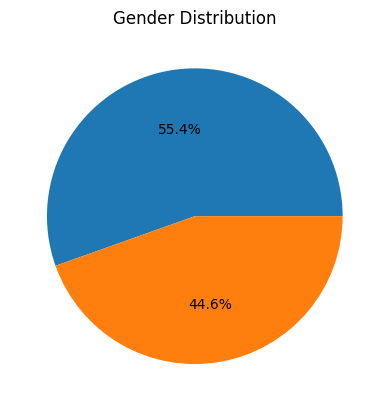

In [20]:
plt.pie(X_resampled['Gender'].value_counts(), autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

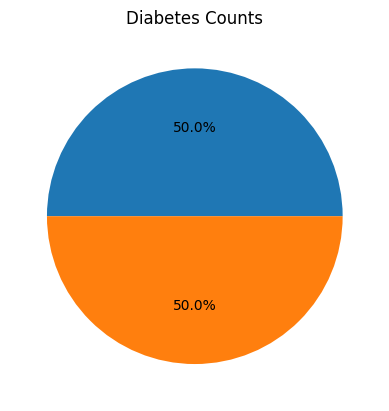

In [21]:
plt.pie(y_resampled.value_counts(),autopct='%1.1f%%')
plt.title('Diabetes Counts')
plt.show()

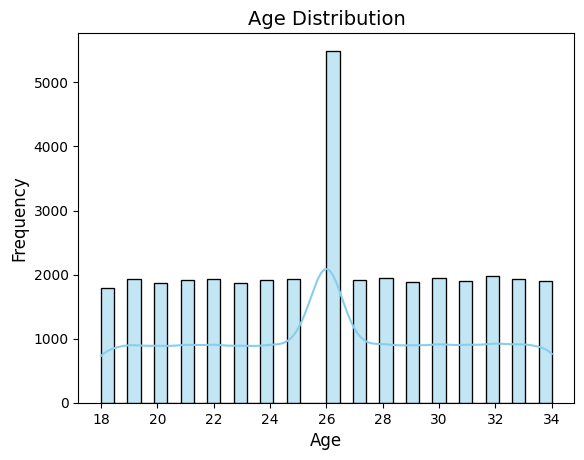

In [22]:


sns.histplot(
    X_resampled['Age'], 
    kde=True,  
    color='skyblue'
)

# Adding titles and labels
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()


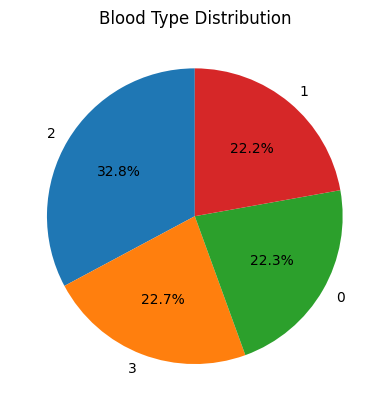

In [23]:
blood_type_counts = X_resampled['Blood Type'].value_counts()

plt.pie(
    blood_type_counts, 
    labels=blood_type_counts.index,  
    autopct='%1.1f%%',  
    startangle=90 
    
)

# Adding a title
plt.title('Blood Type Distribution')

# Display the plot
plt.show()


<Axes: ylabel='Age'>

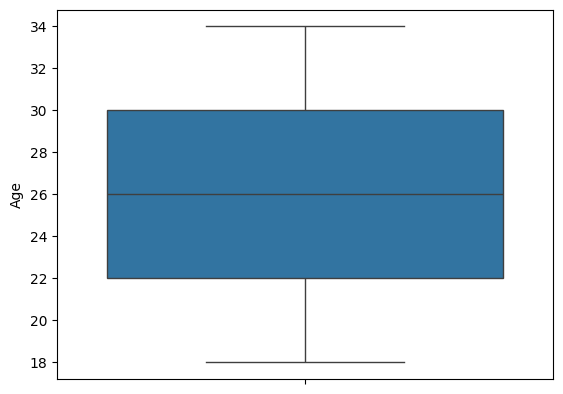

In [24]:
sns.boxplot(X_resampled['Age'])

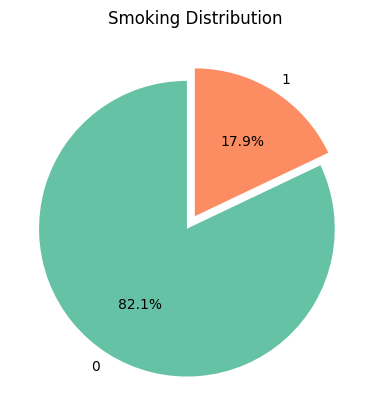

In [25]:
smoking_counts = X_resampled['Smoking'].value_counts()

plt.pie(
    smoking_counts, 
    labels=smoking_counts.index,  
    autopct='%1.1f%%',  
    startangle=90,
    colors=['#66c2a5', '#fc8d62'], 
    explode=(0.1, 0)  )

# Adding a title
plt.title('Smoking Distribution')

# Display the plot
plt.show()


In [26]:
df.columns

Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')

### 0 -> No
### 1-> Yes

In [27]:
print(len(X_resampled))  # Check number of rows in features
print(len(y_resampled))  # Check number of rows in target


36028
36028


In [28]:
X_resampled

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Smoking
175953,31,1,168,70,3,25,98,97,106,184,0
11427,23,1,174,60,1,20,97,66,103,177,0
100137,33,1,162,95,1,23,98,62,119,231,0
61284,33,0,187,54,1,23,99,65,102,162,0
160328,28,1,172,76,2,25,97,94,93,235,0
...,...,...,...,...,...,...,...,...,...,...,...
199965,22,0,166,48,1,17,98,95,109,152,0
199968,26,1,150,70,2,31,98,79,114,170,0
199973,25,0,156,90,2,37,98,70,132,164,0
199976,18,1,164,46,3,17,98,91,132,242,0


In [29]:
y_resampled

175953    0
11427     0
100137    0
61284     0
160328    0
         ..
199965    1
199968    1
199973    1
199976    1
199993    1
Name: Diabetes, Length: 36028, dtype: int32

In [30]:
# train test split
x_train , x_test,y_train ,y_test = train_test_split(X_resampled,y_resampled,test_size = 0.2,random_state =2)

In [31]:
print( x_train.shape , x_test.shape,y_train.shape,y_test.shape)

(28822, 11) (7206, 11) (28822,) (7206,)


In [32]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# Randon forest classifier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
# Gradient boosting classifier
model4 = GradientBoostingClassifier()
model4.fit(x_train,y_train)

GradientBoostingClassifier()

In [35]:
# # Decision tree classsifier
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10,20],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2,3]
}

grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [37]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20]})

In [38]:
# Adjust parameters for RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=50,
    max_depth=20,
    max_samples=0.75,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

# Train the model
model.fit(x_train, y_train)


RandomForestClassifier(max_depth=20, max_samples=0.75, n_estimators=50,
                       random_state=42)

In [39]:
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6307


In [40]:
input_1 = [28,1,172,76,2,25,97,94,99,235,0]
# change input data to numpy array
input_data_as_numpy_array = np.asarray(input_1)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0]==0:
    print("person not suffering from diabetes")
else:
    print("person suffering from diabetes")

[0]
person not suffering from diabetes


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
import pickle
with open('diabetes_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)